In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install openai
!pip install gradio

# 2.1 신경망과의 첫 만남

**신경망 구조**

Dense 층
- 모든 입력 뉴런과 출력 뉴런 사이에 연결된 완전히 연결된(fully connected) 층을 의미
- 각 입력 뉴런과 출력 뉴런 사이의 연결 가중치를 학습하고, 입력 신호에 가중치를 곱한 후 편향(bias)을 더하는 선형 변환(linear transformation)을 수행하고 이 선형 변환의 결과에 활성화 함수(activation function)를 적용하여 출력을 계산
- 예를 들어, Dense 층은 입력 벡터 [x₁, x₂, ..., xₙ]과 가중치 행렬 W, 편향 벡터 b가 주어졌을 때, 출력 벡터 [y₁, y₂, ..., yₘ]를 계산

활성화 함수(Activation function)

- 인공 신경망에서 각 뉴런의 출력을 결정하는 비선형 함수
- 활성화 함수는 입력 신호의 가중치 합과 편향을 적용한 후, 그 결과에 적용되어 다음 층으로 전달
- 인공 신경망에서 비선형성을 도입하고, 신경망의 복잡한 함수 근사(approximation) 능력을 향상시키는 것
- 인공 신경망은 여러 층의 연속된 선형 변환과 비선형 활성화 함수를 조합하여 복잡한 입력과 출력 관계를 학습
- 주요 활성화 함수
  - 시그모이드(Sigmoid) 함수:
    - 범위: 0과 1 사이
    - 주요 특징: 입력값을 확률로 해석할 수 있으며, 비선형 함수로서 미분 가능
    - 단점: 큰 입력값에 대해 그래디언트 소실 문제가 발생할 수 있음
  - 하이퍼볼릭 탄젠트(Tanh) 함수:
    - 범위: -1과 1 사이
    - 주요 특징: 시그모이드와 유사하게 비선형 함수이며, 원점을 중심으로 대칭
    - 단점: 여전히 큰 입력값에 대해 그래디언트 소실 문제가 발생할 수 있음
  - 렐루(ReLU, Rectified Linear Unit) 함수:
    - 범위: 0 이상의 입력에 대해 그대로 출력, 음수 입력에 대해 0 출력
    - 주요 특징: 계산이 간단하고 빠르며, 선형 영역으로 쉽게 학습 가능
    - 단점: 음수 입력에 대해 출력이 0이 되어 해당 뉴런이 활성화되지 않는 문제가 있음 (죽은 렐루 문제)
  - 소프트맥스(Softmax) 함수:
    - 범위: 0과 1 사이
    - 주요 특징: 다중 클래스 분류에 사용되며, 출력값을 확률 분포로 해석
    - 단점: 출력값의 합이 1이 되도록 정규화되어, 다른 출력값에 영향을 받을 수 있음

# 1장 딥러닝이란 무엇인가?
## 1.1 인공 지능과 머신 러닝, 딥러닝
### 1.1.1 인공 지능
- 보통의 사람이 수행하는 지능적인 작업을 자동화하기 위한 연구 활동
- symbolic AI - 프로그래머가 명시적인 규칙을 줌(하드코딩된 규칙)
- 규칙과 데이터 -> 전통적인 프로그래밍 -> 해답 (데이터가 적절한 해답이 되게 하는 규칙, 즉 검퓨터 프로그램을 프로그래머가 작성함
### 1.1.2 머신 러닝
- 기계가 넣어준 데이러토 학습해서 룰을 만들어 내고 -> 그것 룰대로 예측함
- 데이터와 해답 -> 머신 러닝 -> 규칙
- 머신 러닝 시스템은 명시적으로 프로그램되는 것이 아니라 훈련된다
### 1.1.3 데이터에서 표현을 학습하기
-
### 1.1.4 딥러닝에서 '딥'이란 무엇일까?
- 1~2층의 얕은 학습기로 복잡한 문제를 풀기 어려움
- 사람의 신경망을 모방(벤치마킹)하는 것에 대해서 생각하기 시작함
- layer가 깊다는 의미임(연속된 층에 대한 의미)


In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# 28 x 28 픽셀 사이즈가 60,000개 있는 것임
train_images.shape

(60000, 28, 28)

In [12]:
print(train_images[0].shape, '\n')
train_images[59999]

(28, 28) 



array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [13]:
# [[ ]], - 이게 하나의 28 x 28 이미지임
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
train_labels.shape

(60000,)

In [ ]:
import numpy as np

np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
# unit8은 8개의 비트로 256개의 서로 다른 값을 표현
# 이미지 처리에서 많이 사용되는 데이터 형식 중 하나이며, 메모리 관리가 효율적이고 연산에도 효과적

test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

#### 두 가지 방식
1. 순차적인 방식 (Sequential)
- relu - 선형 변환만으로 층을 쌓으면 효과가 없다. 비선형으로 해주어야 함, 선형을 relu함수에 싣는 것??
- softmax - 다중분류, 여러 개로 분류할 때 softmax를 활성화 함수로 쓴다
2. 함수 방식



#### layers
- 신경망의 핵심 구성 요소
- 가장 기본이 되는 층은 dense layer (밀집층)임
- 층은 데이터를 위한 filter로 생각할 수 있음 (어떤 데이터가 들어가면 더 유용한 형태로 출력됨)
- 조금 더 구체적으로 층은 주어진 문제에 더 의미 있는 표현(representation)을 입력된 데이터로부터 추출함
- 대부분의 딥러닝은 간단한 층을 연결하여 구성되어 있고, 점진적으로 데이터를 정제하는 형태를 띠고 있음, 딥러닝 모델은 데이터 정제 필터(층)가 연속되어 있는 데이터 프로세싱을 위한 여과기와 같음
- 케라스의 레이어 keras.layers 패키지 안에는 다양한 층이 준비되어 있음,

#### softmax
- 10개의 확률 점수가 들어 있는 배열(모두 더하면 1)을 반환

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

#### optimizer
- 성능을 향상키시기 위해 입력된 데이터를 기반으로 모델을 업데이트하는 메커니즘, 모델이 훈련하는 동안 가중치를 업데이트하는 알고리즘을 지정하는데 사용
    - rmsprop - 주로 경사 하강법이 사용되며, rmsprop는 경사 하강법 알고리즘 중 하나임

#### loss function
- 훈련 데이터에서 모델의 성능을 측정하는 방법으로 모델이 옳은 방향으로 학습될 수 있도록 도와줌, optimizer의 기준이 되는 것이 손실 함수임
    - sparse_categorical_crossentropy - 분류 문제에서 주로 사용되는 손실 함수 중 하나, 정수 레이블을 가진 데이터에 적합함

#### metrics
-

In [15]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

In [16]:
# 훈련을 시작하기 전에 데이터를 모델에 맞는 크기로 바꾸고 모든 값을 0과 1 사이로 스케일을 조정함
# 신경망 모델에 입력으로 사용하기 위해서는 이미지 데이터를 1차원 형태로 변환해야 함

train_images = train_images.reshape((60000, 28 * 28))    # 이미지 데이터를 1차원으로 펼치는 역할
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [ ]:
# 변경 전
print(train_images[4].ndim)
train_images[4].shape

2


(28, 28)

In [ ]:
# 변경 후
print(train_images[4].ndim)
train_images[4].shape

1


(784,)

In [ ]:
train_images.shape

(60000, 784)

In [17]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 8s 5ms/step - loss: 0.2623 - accuracy: 0.9231
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1056 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0692 - accuracy: 0.9798
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0497 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0382 - accuracy: 0.9887


In [ ]:
128*469

60032

In [18]:
# 각각 784개의 특성을 가진 10,000개의 샘플 중 앞에서 10개의 샘플만 예측
# 다 더하면 1임

test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 75ms/step


array([5.7102866e-08, 4.8492161e-08, 8.4180119e-06, 1.8330717e-04,
       2.0008748e-11, 1.7467684e-08, 7.9927176e-12, 9.9980730e-01,
       2.4030660e-07, 6.2184728e-07], dtype=float32)

In [19]:
# argmax() - 주어진 배열 또는 시퀀스에서 가장 큰 값을 가지는 원소의 인덱스를 반환하는 함수
print(predictions[0].argmax())
predictions[0][7]

7


0.9998073

In [20]:
# 테스트 데이터의 레이블과 맞는지 확인 (정답 확인)
test_labels[0]

7

In [37]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'테스트 정확도: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0667 - accuracy: 0.9800
테스트 정확도: 0.9800000190734863


# 2.2 신경망을 위한 데이터 표현
#### 텐서
- 데이터를 위한 container, 숫자를 위한 컨테이너
- 텐서는 임의의 차원 개수를 가지는 행렬의 일반화된 모습
- 텐서에서는 dimension을 종종 axis라고 부름





## 2.2.1 스칼라(랭크-0 텐서)
- 하나의 숫자만 담고 있는 텐서
- 0차원 = 축 개수인 rank-0

In [ ]:
import numpy as np
x = np.array(12)
print(x.ndim)
x

0


array(12)

## 2.2.2 벡터(랭크-1 텐서)
- 숫자의 배열, 딱 하나의 축을 가짐
- 5개의 원소를 가진 5차원, 5D 벡터임
- 5D 벡터는 하나의 축을 따라 5개의 차원을 가진 것이고 5D 텐서는 5개의 축을 가진 것임 (텐서의 각 축을 따라 여러 개의 차원을 가진 벡터가 놓일 수 있음)

In [ ]:
x = np.array([12, 3, 6, 14, 7])
print(x.ndim)
x

1


array([12,  3,  6, 14,  7])

## 2.2.3 행렬(랭크-2 텐서)

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

## 2.2.4 랭크-3 텐서와 더 높은 랭크의 텐서

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
               [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

## 2.2.5 (텐서의 3개의) 핵심 속성
#### 축의 개수(랭크)
#### 크기(shape)
- 텐서의 각 축을 따라 얼마나 많은 차원이 있는지를 나타낸 파이썬의 tuple
#### 데이터 타입(파이썬 라이브러리에서는 보통 dtype이라고 부름)

#### 이미지 데이터
- 3차원 이미지의 차원은 "가로 픽셀 수 x 세로 픽셀 수 x 이미지 슬라이스 수"로 표현
- 픽셀은 이미지를 구성하는 가장 작은 단위로, "picture element"의 줄임말이며 이미지를 표현하는 데 사용되는 점 또는 화소
- 흑백 이미지의 경우, 각 픽셀은 단일 색상 값을 가지며, 일반적으로 0부터 255까지의 범위로 표현. 0은 픽셀이 검은색에 가깝고, 255는 픽셀이 흰색에 가깝다.
- 컬러 이미지의 경우, 각 픽셀은 일반적으로 RGB(Red, Green, Blue) 값을 가지며 각각 빨강, 초록, 파랑의 강도를 나타내며, 0부터 255까지의 범위로 표현
- 강도의 조합에 따라 다양한 색상이 생성. 예를 들어, (255, 0, 0)은 빨간색, (0, 255, 0)은 초록색, (0, 0, 255)는 파란색
- 각 픽셀은 이미지의 위치에 따라 좌표로 식별. 가장 왼쪽 위 픽셀이 (0, 0)이며, 가로 방향으로 증가하면서 픽셀의 열 인덱스가 증가하고, 세로 방향으로 증가하면서 픽셀의 행 인덱스가 증가
- 이미지 처리 작업에서는 픽셀 단위의 조작이 중요하며, 픽셀 값을 수정하거나 분석하여 다양한 이미지 효과를 생성하거나 이미지에서 정보를 추출

In [42]:
# 다섯 번째 이미지 데이터 - 픽셀당 0~255까지 표현함
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

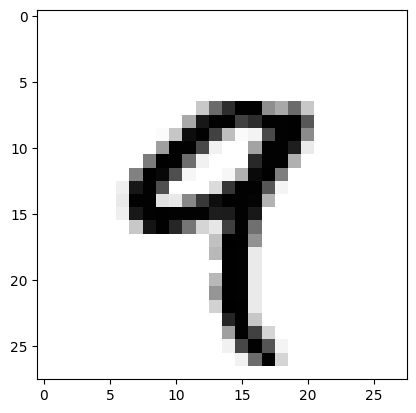

In [45]:
# binary color map - 이진 색상 맵, 흑백 이미지를 표시하는 데 사용됨, 0과 1 사이의 값을 흑백으로 표현하며, 0은 검은색에 가까워지고 1은 흰색에 가까워짐
# MNIST 데이터셋의 픽셀 값은 그레이스케일 값으로, 0은 흰색을 의미하고 255는 검은색을 의미
# 특정 시각화 라이브러리나 플랫폼에 따라서 0과 255의 색상 표현이 반대로 설정될 수 있으며 일부 라이브러리는 0을 검은색으로, 255를 흰색으로 표현

import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_labels[4]

9

## 넘파이로 텐서 조작하기
- 위에어 한 슬라이싱 연산에 대해 알아보기

In [ ]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [ ]:
# 동일하지만 조금 더 자세한 표기법은 각 배열의 축을 따라 슬라이싱의 시작 인덱스와 마지막 인덱스를 지정하는 것
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [ ]:
# 이미지의 오른쪽 아래 14 x 14 픽셀을 선택하기
my_slice = train_images[:, 14:, 14:]

In [ ]:
# 정중앙에 위치한 14 x 14 픽셀 조각을 이미지에서 잘라 낼 때
my_slice = train_images[:, 7:-7, 7:-7]

## 2.2.7 배치 데이터
- 일반적으로 딥러닝에서 사용하는 모든 데이터 텐서의 첫 번째 축(인덱스가 0부터 시작하므로 0번째 축)은 sample axis임 (이따금 sample dimension이라고도 부름)
- 딥러닝 모델은 한 번에 전체 데이터셋을 처리하지 않음, 그 대신 데이터를 작은 batch로 나눔, 구체적으로 말하면 MNIST 숫자 데이터에서 크가기 128인 배치 하나는 다음과 같음
- 배치 데이터를 다룰 때 첫 번째 축(0번 축)을 batch axis 또는 batch dimension이라고 부름

In [ ]:
batch = train_images[:128]

In [ ]:
batch = train_images[128:256]

## 2.2.8 텐서의 실제 사례
#### 앞으로 사용할 데이터의 종류들
1. 백터 데이터
- (samples, features) 크기
- 각 샘플은 수치 속성, 특성, feature로 구성된 벡터<br><br>

2. 시계열 데이터 또는 시퀀스(sequence) 데이터
- (samples, timesteps, features) 크기
- 각 샘플은 특성 벡터의 (길이가 timesteps인) 시퀀스<br><br>

3. 이미지
-  (samples, heitht, width, channels) 또는 (samples, channels, height, width) 크기
- 각 샘플은 픽셀의 2D 격자고 각 픽셀은 수치 값(channel)의 벡터임<br><br>

4. 동영상
- (samples, frames, height, width, channels) 또는 (samples, frames, channels, height, width) 크기
- 각 샘플은 이미지의 (길이가 frames인) 시퀀스임


## 2.2.9 벡터 데이터
- 이런 데이터셋에서는 하나의 데이터 포인트가 벡터로 인코딩될 수 있으므로 배치 데이터는 랭크-2 텐서로 인코딩될 것임(즉, 벡터의 배열임)
- 여기에서 첫 번째 축은 샘플 축이고, 두 번째 축은 특성 축(feature axis)임
- (100,000, 3) - 100,000명의 사람 한 명 당 나이, 성별, 소득이라는 3개의 값을 가진 벡터로 구성됨

## 2.2.10 시계열 데이터 또는 시쿼스 데이터
- 데이터에서 시간이 (또는 연속된 순서가) 중요할 때는 ㅣ간 축을 포함하여 랭크-3 텐서로 저장됨
- 각 샘플은 벡터의 시퀀스(랭크-3 텐서)로 인코딩되므로 배치 데이터는 랭크3 텐서로 인코딩 될 것임

## 2.2.11 이미지 데이터
- 행이 먼저 나오므로 높이가 먼저임
- (128, 256, 256, 1) - batch, height, width, color_depth (흑백도 채널 1로 표현해주는 것이 관례임)
- (128, 256, 256, 3) - 컬러
- 위의 channel-last 방식과 달리 channel-first 방식도 있음 (128, 1, 256, 256)
- 케라스 API는 두 형식을 모두 지원하기는 함
- tensorflow.keras.backend.set_image_data_format() 함수를 사용하여 'channels-last' 또는 'channels_first'로 지정할 수 있음
- PyTorch는 기본적으로 채널 우선 방식을 사용함


## 2.2.12 비디오 데이터
- 비디오 데이터는 현실에서 랭크-5 텐서가 필요한 몇 안 되는 데이터 중 하나임
- (4, 240, 144, 256, 3) - 144 x256유튜브 비디오 클립(컬러 3)을 초당 4프레임으로 샘플링하면 240프레임, 이런 비디오 크립을 4개 가진 배치

# 2.3 신경망의 톱니바퀴: 텐서 연산
- 컴퓨터 프로그램을 이진수의 입력을 처리하는 몇 개의 이항 연산(AND, OR, NOR 등)으로 표현할 수 있는 것처럼, 심층 신경망이 학습한 모든 변환을 수치 데이터 텐서에 적용하는 몇 종류의 텐서 연산(tensor operation)(또는 텐서 함수(tensor function))으로 나타낼 수 있음, 텐서 덧셈이나 텐서 곱센 등임
- 아래의 층은 행렬을 입력으로 받고 입력 텐서의 새로운 표현인 또 다른 행렬을 반환하는 함수처럼 해석할 수 있음 (W는 행렬이고, b는 벡터임- 둘 모두 층의 속성임)
- Dense 클래스의 객체를 Sequential 클래스에 추가할 때 Dense 객체의 build() 메서드가 호출되면서 가중치(커널) W와 편향 b가 생성됨, 각각 Dense 객체의 kernel고 bias 인스턴스 변수에 저장됨
- relu (rectified linear unit) - 입력이 0보다 크면 입력을 그대로 반환하고 0보다 작으면 0을 반환함

```
keras.layers.Dense(512, activation='relu')
=
output = relu(dot(W, input) + b)
```

- 과정
    - 입력 텐서와 텐서 W 사이의 점곱(dot)
    - 점곱으로 만들어진 행렬과 벡터 b 사이의 덧셈(+)
    - relu 연산, relu(x)는 max(x, 0)임

<font color=red> dot이 맞는지 matmul이 맞는지</font>
네, 이해했습니다. matmul은 행렬 곱셈(matrix multiplication)을 의미하는 말로, 행렬 간의 곱셈을 나타냅니다.

정확하게 말씀드리자면, dot 함수와 matmul 함수는 행렬 곱셈을 수행하는 데에는 비슷한 역할을 하지만, 다른 점이 있습니다.

dot: dot 함수는 두 배열의 내적(inner product)을 계산하는 함수로, 행렬 곱셈 연산을 수행합니다. 그러나 다차원 배열의 경우에는 마지막 두 축을 이용하여 계산합니다. 따라서 dot 함수를 사용할 때에는 주의가 필요합니다.

matmul: matmul 함수는 행렬 곱셈 연산을 수행하는 함수로, 두 배열의 행렬 곱셈을 계산합니다. 이 함수는 행렬의 곱셈 규칙에 따라 동작하며, 배열의 차원을 고려하여 행렬 곱셈을 수행합니다.

따라서, 행렬 곱셈을 수행할 때에는 matmul 함수를 사용하는 것이 더 정확한 표현입니다. dot 함수도 일반적으로 행렬 곱셈에 사용될 수 있지만, 다차원 배열의 경우 축에 대한 이해와 주의가 필요합니다.



## 2.3.1 원소별 연산
- relu 함수와 덧셈은 원소별 연산(element-wise operation)임, 이 연산은 텐서에 있는 각 원소에 독립적으로 적용됨
- 파이썬으로 단순한 원소별 원산을 구현한다면 다음 relu 연산 구현처럼 for 반복문을 사용할 것임
- 사실 넘파이 배열을 다룰 때는 최적화된 넘파이 내장 함수로 이런 연산들을 처리할 수 있음, 넘파이는 BLAS(Basic Linear Algebra Subprogram) 구현에 복잡한 일들을 위임함, BLAS는 고도로 병렬화되고 효율적인 저수준의 텐서 조작 루틴이며, 전형적으로 Fortran이나 C 언어로 구현되어 있음
- 대표적인 BLAS 구현으로는 OpenBLAS, 인텔 MKL, ATLAS 등이 있음, 아나콘다 파이썬 배포판은 기본적으로 MKL 라이브러리를 사용함

In [57]:
# relu 연산 구현해 보기

def naive_relu(x):
    assert len(x.shape) == 2    # x는 랭크-2 넘파이 배열임, assert는 조건이 True인지 확인하고 아니면 AssertionError 예외를 발생시킴,
                                # 입력 텐서가 2차원이 아닌 경우 AssertionError 예외 발생시킴
    x = x.copy()    # 입력 텐서 자체를 바꾸지 않도록 복사
    for i in range(x.shape[0]):    # x의 각 원소에 대해 relu 연산을 수행함
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)    # x[i, j]와 0중에서 큰 값을 선택하여 해당 값을 x[i, j]에 대입함
    return x

In [58]:
# 덧셈

def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [53]:
# 넘파이의 원소별 연산의 속도 테스트

import numpy as np
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y    # 원소별 덧셈
    z = np.maximum(z, 0.)    # 원소별 렐루 함수

print('걸린 시간: {0:.2f} s'.format(time.time() - t0))

걸린 시간: 0.01 s


In [56]:
x

array([[0.9712613 , 0.44257687, 0.78077125, ..., 0.41957247, 0.86615389,
        0.66765401],
       [0.87127235, 0.69348404, 0.86987532, ..., 0.78854096, 0.36117104,
        0.7844544 ],
       [0.69851203, 0.77126907, 0.20420459, ..., 0.2302845 , 0.67811009,
        0.38672672],
       ...,
       [0.7906334 , 0.89633849, 0.9922604 , ..., 0.1811573 , 0.13892768,
        0.08646957],
       [0.5568726 , 0.4701042 , 0.22618472, ..., 0.72749044, 0.27518881,
        0.05188421],
       [0.66431811, 0.90362235, 0.3622736 , ..., 0.31085748, 0.12561623,
        0.49914414]])

#### 이와 비슷하게 텐서플로 코드를 GPU에서 실행할 때 고도로 병렬화된 GPU 칩 구조를 최대로 활용할 수 있는 완전히 벡터화된 CUDA 구현을 통해 원소별(element-wise) 연산이 실행됨
- CUDA - GPU에서 벡터화된 연산을 수행할 수 있도록 지원하는 플랫폼

In [59]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)

print('걸린 시간: {0:.2f} s'.format(time.time() - t0))

걸린 시간: 1.97 s


## 2.3.2 브로드캐스팅
- 앞서 살펴본 단순한 덧셈 구현인 naive_add는 동일한 크기의 랭크-2 텐서만 지원함, 하지만 이전에 보았던 Dense 층에서는 랭크-2 텐서와 벡테를 더했음, 크기가 다른 두 텐서가 더해질 수 있었던 것은 작은 텐서가 큰 텐서의 크기에 맞추어 broadcasting되기 때문임
    - 큰 텐서의 ndim에 맞도록 작은 텐서에 (브로드캐스팅 축이라고 부르는) 축이 추가됨
    - 작은 텐서가 새 축을 따라서 큰 텐서의 크기에 맞도록 반복됨

In [60]:
X = np.random.random((32, 10))    # X는 크기가 (32, 10)인 랜덤한 행렬임
print(X[0:3])
y = np.random.random((10,))    # y는 크기가 (10,)인 랜덤한 벡터임
y

[[0.35082383 0.42369023 0.11532645 0.41143435 0.01815763 0.86869687
  0.15440851 0.51408145 0.82844421 0.31492807]
 [0.59762869 0.66315538 0.01905385 0.44743321 0.22395223 0.52114084
  0.85293343 0.78251084 0.11775759 0.43156906]
 [0.44808804 0.08509203 0.78300732 0.53810253 0.84774072 0.54452786
  0.35390247 0.87744809 0.18350484 0.09463697]]


array([0.71344549, 0.17329613, 0.78427044, 0.74365735, 0.63780701,
       0.48780204, 0.51346158, 0.43357057, 0.02597302, 0.24146281])

In [62]:
# np.reshape(y, (10, 1))
# y.reshape(10,1)
y = np.expand_dims(y, axis=0)
y

array([[[0.27032791, 0.1314828 , 0.05537432, 0.30159863, 0.26211815,
         0.45614057, 0.68328134, 0.69562545, 0.28351885, 0.37992696]]])

In [63]:
np.concatenate([y]*32, axis=0)[:3]    # 축 0을 따라 y를 32번 반복하여 크기가 (32,10)인 Y를 얻음

array([[[0.27032791, 0.1314828 , 0.05537432, 0.30159863, 0.26211815,
         0.45614057, 0.68328134, 0.69562545, 0.28351885, 0.37992696]],

       [[0.27032791, 0.1314828 , 0.05537432, 0.30159863, 0.26211815,
         0.45614057, 0.68328134, 0.69562545, 0.28351885, 0.37992696]],

       [[0.27032791, 0.1314828 , 0.05537432, 0.30159863, 0.26211815,
         0.45614057, 0.68328134, 0.69562545, 0.28351885, 0.37992696]]])

In [61]:
import numpy as np

np.random.seed(0)
X = np.random.random((32, 10))    # X는 크기가 (32, 10)인 랜덤한 행렬임
y = np.random.random((10,))    # y는 크기가 (10,)인 랜덤한 벡터임

# 먼저 y에 비어 있는 첫 번째 축을 추가하여 크기를(1, 10)으로 만듦
y = np.expand_dims(y, axis=0)    # 이제 y의 크기는 (1,10)임

# 그런 다음 y를 이 축에 32번 반복하면 텐서 Y의 크기는 (32, 10)이 됨
Y = np.concatenate([y]*32, axis=0)    # 축 0을 따라 y를 32번 반복하여 크기가 (32, 10)인 Y를 얻음

In [64]:
(X + Y)[:3]

array([[0.81914141, 0.84667217, 0.6581377 , 0.84648182, 0.68577295,
        1.10203468, 1.12086855, 1.58739845, 1.24718161, 0.76336847],
       [1.06205294, 0.66037772, 0.62341888, 1.22719527, 0.33315421,
        0.54326987, 0.70349973, 1.52824529, 1.0616756 , 1.2499391 ],
       [1.24894625, 0.93064136, 0.51685368, 1.08212781, 0.38039258,
        1.09606159, 0.82663462, 1.64029436, 0.80536717, 0.7945889 ]])

In [66]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2    # x는 랭크-2 넘파이 배열임, assert - 주어진 조건이 True인지 확인, False면 AssertionError 예외를 발생시킴
    assert len(y.shape) == 1    # y는 넘파이 벡터임
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [67]:
np.random.seed(0)
X = np.random.random((32, 10))    # X는 크기가 (32, 10)인 랜덤한 행렬임
y = np.random.random((10,))

naive_add_matrix_and_vector(X, y)[:3]

array([[0.81914141, 0.84667217, 0.6581377 , 0.84648182, 0.68577295,
        1.10203468, 1.12086855, 1.58739845, 1.24718161, 0.76336847],
       [1.06205294, 0.66037772, 0.62341888, 1.22719527, 0.33315421,
        0.54326987, 0.70349973, 1.52824529, 1.0616756 , 1.2499391 ],
       [1.24894625, 0.93064136, 0.51685368, 1.08212781, 0.38039258,
        1.09606159, 0.82663462, 1.64029436, 0.80536717, 0.7945889 ]])

In [73]:
import numpy as np

x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)    # broadcasting 지원
print(z.shape)
z

(64, 3, 32, 10)


array([[[[0.89743848, 0.95535273, 0.73150291, ..., 0.3167547 ,
          0.82434507, 0.8987299 ],
         [0.2800033 , 0.53604373, 0.93231013, ..., 0.94090242,
          0.5184744 , 0.97367147],
         [0.78150838, 0.62743908, 0.43535072, ..., 0.81717697,
          0.09011865, 0.41097574],
         ...,
         [0.92851422, 0.99317801, 0.20640299, ..., 0.09716652,
          0.48273796, 0.46842544],
         [0.84563625, 0.84782582, 0.96115052, ..., 0.53178824,
          0.97572453, 0.81440422],
         [0.20363616, 0.86655957, 0.65649483, ..., 0.51224803,
          0.8079704 , 0.07494415]],

        [[0.75577711, 0.38262023, 0.35963488, ..., 0.07074974,
          0.77455171, 0.45501827],
         [0.26604432, 0.5768708 , 0.60521004, ..., 0.94090242,
          0.89203822, 0.97367147],
         [0.75712366, 0.76505506, 0.71743226, ..., 0.67184612,
          0.10374201, 0.14406935],
         ...,
         [0.92851422, 0.88119613, 0.70230281, ..., 0.84863332,
          0.71664341, 0.5

## 2.3.3 텐서 곱셈
- 텐서 곱셈(tensor product)
- 점곱(dot product)

In [76]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [78]:
# 두 벡터의 점곱
def naive_vector_dot(x, y):
    assert len(x.shape) == 1    # x와 y는 넘파이 벡터임
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

naive_vector_dot(x, y)

9.411457394459598

In [81]:
# 행렬 x와 벡터 y 사이에서의 점곱

x = np.random.random((32,32))
y = np.random.random((32,))
z = np.dot(x, y)

def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2    # x는 넘파이 행렬
    assert len(y.shape) == 1    # y는 넘파이 벡터
    assert x.shape[1] == y.shape[0]    # x의 두 번째 차원이 y의 첫 번째 차원과 같아야 함
    z = np.zeros(x.shape[0])    # 이 연산은 x의 행과 같은 크기의 0이 채워진 벡터를 만듦
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

naive_matrix_vector_dot(x, y)

array([7.72112885, 7.14441927, 8.12131892, 8.7525412 , 8.87985878,
       6.73984011, 9.82387497, 7.8595803 , 8.25631385, 8.80205215,
       8.89480253, 6.49444094, 8.62684574, 6.75220652, 9.1774624 ,
       8.22050274, 6.77211766, 7.4566165 , 6.91477739, 7.66496916,
       8.58415102, 9.44199225, 8.2678074 , 7.26099562, 6.75365396,
       8.02546959, 8.24500709, 9.22308719, 7.18590635, 9.60638426,
       7.7649222 , 8.27077238])

- 두 텐서 중 하나라도 ndim이 1보다 크면 dot 연산에 교환 법칙이 성립되지 않음, 다시 말하면 dot(x, y)와 dot(y, x)가 같지 않음 (벡터-벡터 점곱은 교환 법칙이 성립하지만 행렬-벡터, 행렬-행렬 점곱은 교환 법칙이 성립하지 않음)
- 물론 점곱은 임의의 축 개수를 가진 텐서에 일반화됨, 가장 일반적인 용도는 두 행렬 간의 점곱일 것임, x.shape[1] == y.shape[0]일 때 두 행렬 x와 y의 점곱(dot(x,y))이 성립되므 x의 행과 y의 열 사이 벡터 점곱으로 인해 (x.shape[0], y.shape[1])크기의 행렬이 됨 (아래 두 코드 참고)


In [83]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

naive_matrix_vector_dot(x, y)

array([7.72112885, 7.14441927, 8.12131892, 8.7525412 , 8.87985878,
       6.73984011, 9.82387497, 7.8595803 , 8.25631385, 8.80205215,
       8.89480253, 6.49444094, 8.62684574, 6.75220652, 9.1774624 ,
       8.22050274, 6.77211766, 7.4566165 , 6.91477739, 7.66496916,
       8.58415102, 9.44199225, 8.2678074 , 7.26099562, 6.75365396,
       8.02546959, 8.24500709, 9.22308719, 7.18590635, 9.60638426,
       7.7649222 , 8.27077238])

In [86]:
x = np.random.random((32,32))
y = np.random.random((32,2))

def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

naive_matrix_dot(x, y)

array([[6.24707351, 6.06136336],
       [6.23769721, 6.79245551],
       [8.5255747 , 8.67806531],
       [7.74176417, 7.73321784],
       [6.83950134, 7.14651869],
       [5.6152786 , 4.83442739],
       [6.87143283, 6.86591164],
       [8.00304309, 6.61671099],
       [8.39386102, 7.7316533 ],
       [6.00712725, 6.3438579 ],
       [6.40491057, 6.88196096],
       [6.9713725 , 5.83968119],
       [5.49051799, 4.96638669],
       [6.7448047 , 7.55889132],
       [6.1724034 , 7.13738752],
       [6.6382646 , 5.61656356],
       [6.27714765, 5.99411512],
       [7.48904996, 6.58466845],
       [5.55795951, 6.56757317],
       [8.21959887, 7.34835169],
       [6.27165481, 7.31114916],
       [6.70200967, 6.20377821],
       [7.12544941, 6.38463949],
       [6.02892287, 4.98213785],
       [7.44016235, 6.68770896],
       [7.30536016, 6.6386037 ],
       [6.24941262, 7.80022751],
       [6.45689121, 6.78585584],
       [7.16499933, 6.65312623],
       [7.78215385, 7.59447581],
       [5.

## 2.3.4 텐서 크기 변환
- 텐서의 크기를 변환한다는 것은 특정 크기게 맞게 열과 행을 재배열한다는 뜻임, 당연히 크기가 변환된 텐서는 원래 텐서와 원소 개수가 동일함

In [ ]:
x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])

print(x.shape, '\n')

x = x.reshape((6,1))
print(x, '\n')

x = x.reshape((2,3))
print(x, '\n')

# 자주 사용하는 특별한 크기 변환은 전치(transposition)임
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(3, 2) 

[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]] 

[[0. 1. 2.]
 [3. 4. 5.]] 



(20, 300)

## 2.3.5 텐서 연산의 기하학적 해석
- 텐서 연산이 조작하는 텐서의 내용은 어떤 기하학적 공간에 있는 좌표 포인트로 해석될 수 있기 때문에 모든 텐서 연산은 기하학적 해석이 가능함
- 벡터 A에 벡터 B를 더하는 것은 점 A를 새로운 위치로 복사하는 동작임
- 원래 점 A에서 새로운 위치까지 거리와 방향은 벡터 B에 의해 결정됨
- 동일한 벡터 덧셈을 평면에 있는 점 집합(하나의 객체)에 적용하면 새로운 위치에서 전체 객체의 복사본을 만들게 됨
- 따라서 텐서 덧셈은 특정 방향으로 특정 양만큼 (객체를 왜곡시키지 않고) 이동하는 행동을 나타냄

- 텐서 연산으로 표현할 수 있는 기본적인 기하학적 연산
    - 이동(translation)
    - 회전(rotation)
    - 크기 변경(scaling)
    - 기울이기(skewing)

<img src = 'https://drive.google.com/uc?id=1bTvb1BrpnrvIZqGHNoMMiDIDnTFcyJxb' height=300 width=500>><br><br>

<img src = 'https://drive.google.com/uc?id=1aDhPNJ4FmTEUFqxfb6E6wVI5tmjpc47P' height=300 width=500>><br><br>

<img src = 'https://drive.google.com/uc?id=1zt1fwifjH6iCV10fHiL3uzEahLjanlKu' height=300 width=500>><br><br>

<img src = 'https://drive.google.com/uc?id=1OD-8NyhdMQvluponFhRQ_hp3SNRo5iHH' height=300 width=500>><br><br>

<img src = 'https://drive.google.com/uc?id=1Ceafi4IPvIzqOKKKGn45SwKWzWSLqFMc' height=300 width=500>><br><br>




- 선형 변환(linear transform)
    - 여기에서 원점을 기준으로 발생하는 변환이 이기에 회적과 크기 변경이 포함됨

- 아핀 변환(affine transform)
    - 크기 변경, 회전, 이동, 기울기 등을 모두 포함하는 선형 변환임
    - (어떤 행렬과 점곱하여 얻는) 선형 변환과 (벡터를 더해 얻는) 이동의 조합임
    - 이는 Dense 층에서 수행되는 y = Wx+b 계산과 정확히 일치함
    - 활성화 함수를 사용하지 않는 Dense 층은 일종의 아핀 변환 층임

<img src = 'https://drive.google.com/uc?id=1CDTtXPFTgDrs4-ypD1feK3H_8kFeV_ez' height=300 width=500>><br><br>

- relu 활성화 함수를 사용하는 Dense 층
    - 아핀 변환의 중요한 성질 하나는 여러 아핀 변환을 반복해서 적용해도 결국 하나의 아핀 변환이 된다는 것임(따라서 처음에 이 하나의 아핀 변환을 적용할 수 있음)
    - 결국 활성화 함수 없이 Dense 층으로만 구성된 다층 신경망은 하나의 Dense 층과 같음
    - 하나의 선형 모델이 심층 신경망으로 위장한 것과 같음
    - 이것이 relu 같은 활성화 함수가 필요한 이유임
    - 활성화 함수 덕분에 Dense 층을 중첩하여 매우 복잡하고 비선형적인 기하학적 변형을 구현하며 심층 신경망에 매우 풍부한 가설 공간을 제공할 수
    
<img src = 'https://drive.google.com/uc?id=1CDTtXPFTgDrs4-ypD1feK3H_8kFeV_ez' height=300 width=500>><br><br>


선형 변환, 아핀 변환을 많이 하면 층을 하나 둔 것돠 다를 바 없다.

그래서 활성화 함수를 추가적으로 둠으로써 층을 거듭해도 필터링 효과를 올리는 것이다

기하학적 변형을 하는 이유는 기계가 좀 더 잘 예측할 수 있게 하기 위하여

## 2.3.6 딥러닝의 기하학적 해석
- 신경망은 전체적으로 텐서 연산의 연결로 구성됨
- 그리고 모든 텐서 연산은 입력 데이터의 간단한 기하학적 변환임
- 단순한 단계들이 길게 이어져 구현된 신경망을 고차원 공간에서 매우 복잡한 기하학적 변환을 하는 것으로 해석할 수 있음
- 예를 들어, 하나는 빨간색이고 다른 하나는 파란색인 2개의 색종이가 있다고 가정하고, 두 장을 겹친 다음 뭉쳐서 작은 공으로 만듦
- 이 종이 공이 입력 데이터고 색종이는 분류 문제의 클래스임, 신경망이 해야 할 일은 종기 공을 펼쳐서 두 클래스가 다시 깔끔하게 분리되는 변환을 찾는 것임
- 손가락으로 종이 공을 조금씩 펼치는 것처럼 딥러닝을 사용하여 3D 공간에서 간단한 변환들을 연결해서 이를 구현함
- 고차원 공간에서 복잡하고 심하게 꼬여 있는 데이터의 매니폴드(매니폴드는 구겨진 종이처럼 하나의 연속적인 표면)에 대한 깔끔한 표현을 찾는 일임
- 매니폴드는 국부적으로 저차원의 유클리드 거리로 볼 수 있는 고차원 공간임


<font color=red>어려움, 추후 학습</font>

# 2.4 신경망의 엔진: 그레이디언트 기반 최적화
- 초기에는 가중치 행렬이 작은 난수로 채워져 있음
- 피드백 신호에 기초하여 가중치가 점진적으로 조정됨 -> 이런 점진적인 조정 또는 training이 머신 러닝 학습의 핵심임
- 단계
    - 훈련 샘플 x와 이에 상응하는 타깃 y_true의 배치를 추출
    - x를 사용하여 모델을 실행하고(forward pass 단계), 예측 y_pred를 구함
    - y_pred와 y_true의 차이를 측정하여 이 배치에 대한 모델의 손실을 계산 (=모델의 손실)
    - 배치에 대한 손실이 조금 감소되도록 모델이 모든 가중치를 업데이트함
- <font color=red>이 모델은 입력에 정확한 타깃을 매핑하는 것을 학습했음</font>
- 위의 단계에서 어려운 부분은 모델의 가중치를 업데이트하는 4단계임

## 2.4.1 도함수란?

## 2.4.2 텐서 연산의 도함수: 그레이디언트

## 2.4.3 확률적 경사 하강법
- 미분 가능한 함수가 주어지면 이론적으로 이 함수의 최솟값을 해석적으로 구할 수 있음
- 함수의 최솟값은 도함수가 0인 지점임, 따라서 우리가 할 일은 도함수가 0이 되는 지점을 모두 찾고 이 중에서 어떤 포인트의 함수 값이 가장 작은지 확인하는 것임
- 신경망에 적용하면 가장 작은 손실 함수의 값을 만드는 가중치의 조합을 해석적으로 찾는 것을 의미함
- grad(f(W), W) = 0을 풀면 됨
    - 함수 f(W)를 W에 대한 미분한 결과를 나타내는 벡터
- 랜덤한 배치 데이터에서 현재 손실 값을 토대로 하여 조금씩 파라미터를 수정함, 미분 가능한 함수를 가지고 있으므로 그레이디언트를 계산하여 단계 4를 효율적으로 구현할 수 있음, 그레이디언트의 반대 방향으로 가중치를 업데이트하면 손실이 매번 조금씩 감소할 것임
    1. 훈련 샘플 배치 x와 이에 상응하는 타깃 y_true를 추출
    2. x로 모델을 실행하고 예측 y_pred를 구함(정방향 패스)
    3. 이 배치에서 y_pred와 y_true 사이의 오차를 측정하여 모델의 손실을 계산
    4. 모델의 파라미터에 대한 손실 함수의 그레이디언트를 계산(backward pass)
    5. 그레이디언트의 반대 방향으로 파라미터를 조금 이동시킴, 예를 즐어 W -= learning_rate * gradient처럼 하면 배치에 대한 손실이 조금 감소할 것임, 학습률(learning rate)은 경사 하강법 과정의 속도를 조절하는 스칼라 값임
- 이것이 바로 mini-batch SGD(stochastic gradient descent) 미니 배치 확률적 경사 하강법임

#### 알고리즘 종류
- 배치 경사 하강법 - 가용한 모든 데이터를 사용하여 반복 실행(정확하게 업데이트 되지만 많은 비용 발생)
- 미니 배치 SGD - 위 아래 극단적인 두 가지 방법의 효율적인 절충안은 적절한 크기의 미니 배치를 사용하는 것임
- true SGE - 반복마다 하나의 샘플과 하나의 타깃을 뽑는 것

#### 변종들
- (업데이트할 다음 가중치를 계산할 때 현재 그레이디언트 값만 보지 않고 이전에 업데이트된 가중치를 여러 가지 다른 방식으로 고려하는 SGD 변종들이 많음)
- (이런 변종들을 모두 최적화 방법(optimization method), optimizer라고 부름)
- momentum SGD - SGD에 있는 2개의 문제점인 수렴 속도와 지역 최솟값을 해결함
- Adagrad
- RMSProp



지역 최솟값(Local minimum)과 안장점(Saddle point)은 함수의 극소점을 나타내는 용어입니다.

지역 최솟값은 주어진 함수에서 특정 지역에서만 최소값을 가지는 점을 말합니다. 다시 말해, 주변 이웃보다 더 작은 함수값을 가지지만, 전역적으로는 최소값이 아닐 수 있습니다. 함수의 전역 최소값과 구별되는 특징은 지역적으로만 유효하다는 점입니다. 함수의 형태에 따라 지역 최솟값이 여러 개 존재할 수 있습니다.

안장점은 주어진 함수에서 특정 지점에서 극소점이 아니지만 극값을 가지는 점을 말합니다. 이는 함수의 그래디언트가 0이지만, 두 개 이상의 방향으로 곡면이 형성되어 있는 경우입니다. 즉, 안장점에서는 한 방향으로는 최소값, 다른 방향으로는 최대값을 가지지만 전체적으로는 극값을 가지는 점입니다.

지역 최솟값은 지역적으로만 작은 값을 가지는 점이며, 안장점은 극값을 가지는 점으로서 특정 방향으로는 최소값, 다른 방향으로는 최대값을 가집니다. 이러한 차이점으로 인해 최적화 알고리즘 등에서 지역 최솟값을 탈출하고 전역 최솟값을 찾는 것이 중요하며, 안장점은 함수의 형태와 최적화 알고리즘의 동작에 영향을 줄 수 있습니다.

#### momentum 개념
- 지역 최솟값 문제
    - 그 지점 근처에서는 왼쪽으로 이동해도 손실이 증가하고, 오른쪽으로 이동해도 손실이 증가함, 대상 파라미터가 작은 학습률을 가진 SGD로 최적화되었다면 최적화 과정이 전역 최솟값으로 향하지 못하고 이 지역 최솟값에 갇히게 됨
- 지역 최솟값 문제 해결
    - 물리학에서 영감을 얻은 모멘텀을 사용하여 이 문제를 피할 수 있음, 여기에서 최적화 과정을 손실 곡선 위로 작은 공을 굴이는 것으로 생각하면 쉽게 이해할 수 있음, 모멘텀이 충분하면 공이 골짜기에 갇히지 않고 전역 회솟값에 도달할 것임, 모멘텀은 현재 기울기 값(현재 가속도)뿐만 아니라 (과거의 가속도로 인한) 현재 속도를 함께 고려하여 각 단계에서 공을 움직임, 실전에 적용할 때는 현재 그레이디언트 값뿐만 아니라 이전에 업데이트한 파라미터에 기초하여 파라미터 w를 업데이트함
- 경사 하강법 최적화에 관성을 도입하여 이전 단계에서 계산된 그레이디언트 방향을 유지하고 더 빠른 수렴을 도와주는 기법
- 이전 단계의 속도인 'past_velocity'와 현재 단계에서 계산된 그레이디언트를 고려하여 새로운 속도 'velocity'를 계산함, 이를 통해 그레이디언트의 방향과 크기를 고려한 업데이트가 이루어짐

```
# 모멘텀을 두 번 반복하는 Nesterov Momentum 알고리즘 구현한 것임
# 기본 모멘텀은 여섯 번째 줄을 w = w + velocity로 바꿔주면 됨

past_velocity = 0.     # 이전 단계에서 계산된 속도
momentum = 0.1    # 모멘텀 상수
while loss > 0.01:    # 최적화 반복 루프
    w, loss, gradient * past_velocity - learning_rate * gradient
    velocity = momentum * past_velocity - learning_rate * gradient
    w = w + momentum * velocity = learning_rate * gradient
    past_velocity = celocity
    update_parameter(w)
```

```
# 사용 예
from tensorflow.keras import optimizers

sgd = optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
network.compile(optimizer=sgd, ...)

```





## 2.4.4 도함수 연결: 역전파 알고리즘

#### 연쇄 법칙
- 역전파는 (덧셈, 렐루, 텐서 곱셈 같은) 간단한 연산의 도함수를 사용해서 이런 기초적인 연산을 조합한 복잡한 연산의 그레이디언트를 쉽게 계산하는 방법임
- 결정적으로 신경망은 서로 연결된 많은 텐서 연산으로 구성됨, 이런 연산은 간단하고 해당 도함수가 알려져 있음
- 함수 f와 g의 도함수를 알고 있다면 fg의 도함수를 계산할 수 있음, 중간에 함수를 더 추가하면 chain처럼 보이기 때문에 연쇄 법칙(chain rule)이라고 부름
    - 연쇄 법칙 - 미분의 연쇄적인 성질을 나타내는 법칙으로, 합성 함수의 도함수(미분)를 구하는 방법을 제공함
- 신경망의 그레이디언트 값을 계산하는 데 이 연쇄 법칙을 적용하는 것이 역전파 알고리즘임
- 신경망의 그레이디언트 값을 계산하는 데 이 연쇄 법칙을 적용하는 것이 역전파 알고리즘임

#### 계산 그래프를 활용한 자동 미분
<img src = 'https://drive.google.com/uc?id=11ZPAV_hR0Wh56Dk5eY9x4lI-FvxAMEFg' height=500 width=200>><br><br>


### 텐서플로와 그레이디언트 테이프 (GradientTape)
- 텐서플로의 강력한 자동 미분 기능을 활용할 수 있는 API
- 이 API는 파이썬의 with문과 함께 사용하여 해당 코드 블록 안의 모든 텐서 연산을 계산 그래프 형태로 기록함
- 그다음 이 그래프를 사용해서 (tf.Variable 클래스의 인스턴스인) 변수 또는 변수 집합에 대한 어떤 출력의 그레이디언트도 계산할 수 있음
tf.Variable은 변경 가능한(mutable) 상태를 담기 위한 특별한 종류의 텐서임, 예를 들어 신경망의 가중치는 항상 rf.Variable의 인스턴스임

### TensorFlow를 사용하여 변수 x에 대한 식 y = 2 * x + 3의 그래디언트(기울기)를 계산하고 tape.gradient()를 사용하여 y에 대한 x의 그래디언트를 계산. 이를 통해 x의 값을 조정할 때 y가 어떻게 변화하는지를 알 수 있으며, 이는 모델의 최적화와 역전파 알고리즘에서 매우 유용.
- TensorFlow 변수 x를 생성합니다. tf.zeros((2, 2))를 사용하여 크기가 2x2이고 모든 요소가 0인 행렬로 초기화
- tf.GradientTape()를 사용하여 GradientTape 컨텍스트를 생성하고 tape를 사용하여 연산을 기록
- y = 2 * x + 3의 연산을 수행하고 결과를 변수 y에 저장. 이 때, TensorFlow의 브로드캐스팅(broadcasting) 기능을 사용하여 x의 각 요소에 2를 곱하고 3을 더함.
- tape.gradient()를 사용하여 y에 대한 x의 그래디언트를 계산. 이를 통해 y를 x에 대해 미분한 결과, 즉 y에 대한 x의 기울기를 구한다. tape.gradient()의 첫 번째 인자로는 그래디언트를 계산하고자 하는 결과값(y)을 전달하고, 두 번째 인자로는 그래디언트를 계산하고자 하는 변수(x)를 전달.
- grad_of_y_wrt_x에는 y에 대한 x의 그래디언트가 저장된다.

In [2]:
import tensorflow as tf

x = tf.Variable(0.)    # 초깃값 0으로 스칼라 변수를 생성함
with tf.GradientTape() as tape:    # GradientTape 블록을 시작함
    y = 2 * x + 3    # 이 블록 안에서 변수에 텐서 연산을 적용함
grad_of_y_wrt_x = tape.gradient(y, x)    # tape를 사용해서 변수 x에 대한 출력 y의 그레이디언트를 계산함

In [ ]:
# GradientTape를 다차원 텐서와 함께 사용할 수 있음

x = tf.Variable(tf.zeros((2,2)))    # 크기가 (2,2)고 초깃값이 모두 0인 변수를 생성
with tf.GradientTape() as tape:
    y = 2 * x + 3

grad_of_y_wrt_x = tape.gradient(y, x)

In [5]:
# 변수 리스트의 그레이디언트를 계산할 수도 있음

W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b    # matmul은 텐서플로의 점곱 함수임
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])    # grad_of_y_wrt_and_b는 2개의 텐서를 담은 리스트임, 각 텐서는 W, b와 크기가 같음

In [ ]:
# 가중치 행렬임
grad_of_y_wrt_W_and_b    # y의 각 원소가 W의 해당 위치에 대한 그레이디언트 값을 나타냄
                         # y에 대한 b의 그레이디언트임

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.4641074, 0.4641074],
        [1.291969 , 1.291969 ]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

# 2.5 첫 번째 예제 다시 살펴보기
- 층이 서로 연결되어 모델을 구성
- 모델은 입력 데이터를 예측으로 매핑함(y_pred)
- 그다음 손실 함수가 이 예측과 타깃을 비교하여 손실 값을 만듦 (즉, 모델의 예측이 기대한 것에 얼마나 잘 맞는지 측정함)
- 옵티마이저는 이 손실 값을 사용하여 모델의 가중치를 업데이트함

<img src = 'https://drive.google.com/uc?id=11kHsXZQr4trkopUl9OLr2VMelxVUcygs' height=350 width=400>


#### 옵티마이저
- 모델의 학습 과정을 통제하고, 모델의 성능을 개선하는 역할
- 손실 함수 (또는 비용 함수)를 최소화하는 파라미터를 찾는 과정이며, 이 과정은 최적화 (Optimization)라고 함
- 옵티마이저
  - 확률적 경사 하강법 (SGD): 가장 기본적인 옵티마이저로, 각 훈련 단계에서 하나의 데이터 포인트 (또는 작은 배치)에 대한 그래디언트를 계산하여 모델 파라미터를 업데이트
  - 모멘텀: 경사 하강법에 '관성' 개념을 추가하여, 최적화 과정이 수렴을 가속화하고 지역 최솟값에서 벗어나는 데 도움
  - AdaGrad: 학습률이 각 파라미터에 따라 다르게 적용되는 적응형 학습률을 사용합니다. 이는 자주 등장하지 않는 피처에 높은 학습률을 할당하는 데 도움
  - RMSProp: AdaGrad의 문제점인 학습률이 너무 빨리 감소하는 문제를 해결한 방법
  - Adam (Adaptive Moment Estimation): 모멘텀과 RMSProp의 아이디어를 결합한 옵티마이저로, 적응형 학습률과 관성 개념을 모두 사용

#### 손실 함수 (Loss Function)
- 머신러닝 모델의 예측 출력이 실제 값과 얼마나 잘 일치하는지를 측정하는 방법
- 실 함수는 모델의 성능을 수치화하며, 이를 통해 모델의 파라미터를 최적화하는 데 사용
- 유형
  - 평균 제곱 오차 (Mean Squared Error, MSE): 회귀 문제에서 가장 일반적으로 사용되는 손실 함수. 실제 값과 모델의 예측 값 사이의 차이를 제곱한 값의 평균을 계산
  - 크로스 엔트로피 (Cross-Entropy): 분류 문제에서 일반적으로 사용되는 손실 함수. 모델의 예측 확률 분포와 실제 값의 분포 사이의 차이를 측정
  - sparse_categorical_crossentropy는 크로스 엔트로피 손실 함수의 한 형태로, 다중 클래스 분류 문제에서 주로 사용
  - 힌지 손실 (Hinge Loss): 서포트 벡터 머신 (SVM)과 같은 알고리즘에서 사용
  - 로그 손실 (Log Loss): 이진 분류 문제에서 사용되며, 예측 확률을 직접적으로 반영

dense - 빽빽한 (=fully connected or fully connected layer)

뉴런은 가중치(Weight)와 편향(Bias)을 가지고

가중치 텐서 - 인공 신경망에서 각 연결의 가중치를 저장하는 다차원 배열

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers

 (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 훈련을 시작하기 전에 데이터를 모델에 맞는 크기로 바꾸고 모든 값을 0과 1 사이로 스케일을 조정함
# 신경망 모델에 입력으로 사용하기 위해서는 이미지 데이터를 1차원 형태로 변환해야 함
train_images = train_images.reshape((60000, 28 * 28))    # 이미지 데이터를 1차원으로 펼치는 역할
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# 모델
# sequential
# 연속적인 (딥러닝에서 입력 데이터를 받아 처리하고 출력을 다음 층으로 전달함,
# 이렇게 순서대로 연결된 층들은 데이터가 입력에서 출력 방향으로 흐르는 구조를 가지며, 이러한 구조에서 이 용어가 사용됨)
# 2개의 Dense 층이 연결되어 있고 각 층은 가중치 텐서를 포함하여 입력 데이터에 대한 몇 개의 간단한 텐서 연산을 적용함,
# 층의 속성인 가중치 텐서는 모델이 정보를 저장하는 곳임
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 모델을 컴파일하는 단계
# optimizer - 모델이 훈련하는 동안 가중치를 업데이트하는 알고리즘을 지정하는데 사용
# rmsprop - 주로 경사 하강법이 사용되며, rmsprop는 경사 하강법 알고리즘 중 하나임
# optimizer의 기준이 되는 것이 손실 함수

# sparse_categorical_crossentropy
# 희소 범주형 크로스 엔트로피
# 분류 문제에서 주로 사용되는 손실 함수 중 하나,
# 가중치 텐서를 학습하기 위한 피드백 신호로 사용되며 훈련하는 동안 최소화됨, 미니 배치 확률적 경사 하강법을 통해 손실이 감소됨
# 경사 하강법을 적용하는 구체적인 방식은 첫 번째 매개변수로 전달된 rmsprop 옵티마이저에 의해 결정됨
# 정수 레이블을 가진 데이터에 적합함

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

# 마지막으로 훈련 반복
# 모델이 128개의 샘플의 미니 배치로 훈련 데이터를 다섯 번 반복함(전체 훈현 데이터에 수행되는 각 반복을 에포크라고 함),
# (미적분의 연쇄 법칙에서 파생된 역전파 알고리즘을 사용하여) 각 배치에서 모델이 가중치에 대한 손실의 그레이디언트를 계산함
# 그다음 배치에서 손실 값을 감소시키는 방향으로 가중치를 이동시킴
# 에포크마다 469번의 업데이트, 다섯 번의 에포크 동안 모델은 2,345번의 그레이디언트 업데이트를 수행함
# 훈련 데이터셋 60,000 = 128 * 469
# batch - 전체 데이터셋을 작은 일부 그룹으로 나누는 것을 의미함, 일반적으로 딥러닝 모델은 한 번에 모든 데이터를 처리하지 않고,
# 작은 배치로 나누어서 처리함 (메모리 효율성, 계산 속도-병렬처리, 일반화 성능-데이터의 다양성)
model.fit(train_images, train_labels, epochs=5, batch_size=128)

## 2.5.1 텐서플로를 사용하여 첫 번째 예제를 밑바닥부터 다시 구현하기

dot, matmul - 둘 다 행렬의 곱셈 연산을 수행하는 함수, 차이는 있음

matmul과 dot은 둘 다 행렬의 곱셈 연산을 수행하는 함수입니다. 그러나 두 함수에는 약간의 차이가 있습니다.

matmul: 행렬의 곱셈 연산을 수행합니다. tf.matmul(a, b)는 a와 b의 행렬 곱을 계산합니다. a와 b는 2D 이상의 텐서일 수 있으며, 행렬의 크기에 맞는 곱셈을 수행합니다. 예를 들어, a의 shape이 (m, n)이고 b의 shape이 (n, p)이면, 결과는 shape이 (m, p)인 행렬이 됩니다.

dot: 행렬의 곱셈 연산을 수행합니다. tf.tensordot(a, b, axes)는 a와 b의 텐서 곱을 계산합니다. axes 인수를 통해 곱셈이 수행될 축을 지정할 수 있습니다. 만약 axes를 지정하지 않으면, a와 b의 마지막 축에서의 내적을 수행합니다.

따라서 output = activation(dot(W, input) + b)는 입력 input과 가중치 W의 내적을 계산하고, 편향 b를 더한 후, 활성화 함수인 activation을 적용하는 연산을 수행합니다. 이때, dot 함수는 matmul과 유사한 역할을 수행하며, 마지막 축에서의 내적을 계산합니다.

#### 가중치 vs 그래디언트
가중치는 신경망의 출력을 결정하는 파라미터이며, 그래디언트는 이러한 가중치를 어떻게 조정할지를 결정하는 방향성을 제공하는 지표
- 가중치는 각 입력 특성이 출력에 미치는 영향의 정도를 나타냅니다. 가중치는 학습 과정에서 최적화되며, 초기에는 일반적으로 임의의 값으로 설정되고, 학습 데이터를 통해 그래디언트를 계산하고 가중치를 업데이트함으로써 점진적으로 개선
- 그래디언트(Gradient): 그래디언트는 가중치가 변할 때 손실 함수가 어떻게 변하는지를 나타내는 지표. 그래디언트는 손실 함수의 편미분으로 계산되며, 이는 각 가중치에 대한 손실의 변화율을 나타낸다. 그래디언트는 가중치를 어떻게 업데이트할지를 결정하는데 사용되며, 손실을 줄이는 방향으로 가중치를 조정하는데 도움이 되며 그래디언트가 0인 경우, 해당 가중치는 손실에 미치는 영향이 없거나, 손실을 최소화하는 최적의 값에 도달했음을 의미

#### 단순한 Dense 클래스
- W와 b - 모델 파라미터
- activation - 각 원소에 적용되는 함수(relu, softmax)
- 2개의 텐서플로 변수 W와 b를 만들고 __call__() 메서드에서 앞서 언급한 변환을 적용
```
output = activation(dot(W, input) + b)
```




In [8]:
import tensorflow as tf

class NaiveDense:    # 간단한 기본적인 Dense 층 구현하는 사용자 함수를 의미함
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)    # 랜덤한 값으로 초기화된(input_size, output_size) 크기의 행렬 W를 만듦
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)    # 균일 분포에서 난수 생성, maxval = 0.1
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)    # 0으로 초기화된(output_size) 크기의 벡터 b를 만듦
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):    # 입력 데이터를 받아 정방향 패스를 수행하여 변환을 해주는 역할, 정방향 패스를 수행함
        return self.activation(tf.matmul(inputs, self.W) + self.b)    # 계산 결과에 self.activation 함수를 적용하여 변환된 값을 반환함

    @property    # 클래스 내에서 메서드를 속성(property)으로 정의하는 파이썬 데코레이터임
    def weights(self):    # 층의 가중치를 추출하기 위한 메서드, weights 메서드를 속성으로 정의함으로써, 해당 속성에 접근하는 것처럼 호출할 수 있게 됨
        return [self.W, self.b]

#### 단순한 Sequential 클래스
- NaiveSequential 클래스를 만들어 층 연결하기
- 층의 리스트를 받고 __call__() 메서드에서 입력을 사용하여 층을 순서대로 호출함
- 층의 파라미터를 쉽게 구할 수 있도록 weights 속성을 제공함

In [9]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [10]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),    # neural network
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4    # 층이 2개라 w,b가 각각 2개씩 총 4개임

#### 배치 제너레이터
- MNIST 데이터를 미니 배치로 순회

In [11]:
# 배치 제너레이터
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

## 2.5.2 훈련 스텝 실행하기
1. 배치에 있는 이미지에 대해 모델의 예측을 계산함
2. 실제 레이블을 사용하여 이 예측의 손실 값을 계산함
3. 모델 가중치에 대한 손실의 그레이디언트를 계산함
    - 그레이디언트 계산을 위해 GradientTape 객체 사용
4. 이 그레이디언트의 반대 방향으로 가중치를 조금 이동함


In [12]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [13]:
# update_weights 함수에 해당하는 '가중치 업데이터' 단계의 목적은 이 배치의 손실을 감소시키기 위한 방향으로 가중치를 '조금' 이동하는 것임
# 이동의 크기는 '학습률'에 의해 결정됨, 학습률은 일반적으로 작은 값임
# update_weithts 함수를 구현하는 가장 간단한 방법은 각 가중치에서 gradient * learning_rate를 빼는 것임
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
# 실제로는 이런 가중치 업데이트 단계를 수동으로 구현하는 경우는 거의 없음, 그 대신 다음과 같이 케라스의 Optimizer 인스턴스를 사용함
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

## 2.5.3 전체 훈련 루프
- 훈련 에포크 하나는 단순히 훈련 데이터의 각 배치에 대한 훈련 스텝을 반복하는 것임, 전체 훈련 루프(loop)는 단순히 에포크의 반복임

In [14]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"에포크 {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"{batch_counter}번째 배치 손실: {loss:.2f}")

In [15]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

11490434/11490434 [==============================] - 1s 0us/step
에포크 0
0번째 배치 손실: 6.14
100번째 배치 손실: 2.21
200번째 배치 손실: 2.18
300번째 배치 손실: 2.10
400번째 배치 손실: 2.22
에포크 1
0번째 배치 손실: 1.92
100번째 배치 손실: 1.86
200번째 배치 손실: 1.80
300번째 배치 손실: 1.72
400번째 배치 손실: 1.83
에포크 2
0번째 배치 손실: 1.60
100번째 배치 손실: 1.56
200번째 배치 손실: 1.49
300번째 배치 손실: 1.43
400번째 배치 손실: 1.51
에포크 3
0번째 배치 손실: 1.34
100번째 배치 손실: 1.33
200번째 배치 손실: 1.24
300번째 배치 손실: 1.22
400번째 배치 손실: 1.28
에포크 4
0번째 배치 손실: 1.15
100번째 배치 손실: 1.15
200번째 배치 손실: 1.04
300번째 배치 손실: 1.06
400번째 배치 손실: 1.11
에포크 5
0번째 배치 손실: 1.00
100번째 배치 손실: 1.01
200번째 배치 손실: 0.90
300번째 배치 손실: 0.93
400번째 배치 손실: 0.99
에포크 6
0번째 배치 손실: 0.89
100번째 배치 손실: 0.90
200번째 배치 손실: 0.80
300번째 배치 손실: 0.84
400번째 배치 손실: 0.90
에포크 7
0번째 배치 손실: 0.81
100번째 배치 손실: 0.82
200번째 배치 손실: 0.72
300번째 배치 손실: 0.77
400번째 배치 손실: 0.83
에포크 8
0번째 배치 손실: 0.74
100번째 배치 손실: 0.75
200번째 배치 손실: 0.66
300번째 배치 손실: 0.72
400번째 배치 손실: 0.78
에포크 9
0번째 배치 손실: 0.69
100번째 배치 손실: 0.69
200번째 배치 손실: 0.61
300번째 배치 손실: 0.67
400번째 배치 손실: 

## 2.5.4 모델 평가하기
- 테스트 이미지에 대한 예측에 argmax 함수를 적용하고, 예상 레이블과 비교하여 모델을 평가

In [17]:
import numpy as np

predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"정확도: {matches.mean():.2f}")

정확도: 0.81


# 2.6 요약
- 텐서는 현대 머신 러닝 시스템의 기초임, 텐서는 dtype, ndim, shape 속성을 제공함
- 텐서 연산(덧셈, 텐서 곱셈, 원소별 곱셈 등)을 통해 수치 텐서를 조작할 수 있음, 이런 연산은 기하학적 변형을 적용하는 것으로 이해할 수 있음, 일반적으로 딥러닝의 모든 것은 기하학적으로 해석할 수 있음
- 딥러닝 모델은 가중치 텐서를 매개변수로 받는 간단한 텐서 연산을 연결하여 구성됨, 모델의 가중치는 모델이 학습한 '지식'을 저장하는 곳임
- 학습(learning)은 훈련 데이터 샘플과 그에 상응하는 타깃이 주어졌을 때 손실 함수를 최소화하는 모델의 가중치 값을 찾는 것을 의미함
- 데이터 샘플과 타깃의 배치를 랜덤하게 뽑고 이 배치에서 모델 파라미터에 대한 손실의 그레이디언트를 계산함으로써 학습이 진행됨, 모델의 파라미터는 그레이디언트의 반대 방향으로 조금씩(학습률에 의해 정의된 크기만큼) 움직임, 이를 미니 배치 경사 하강법이라고 부름
- 전체 학습 과정은 신경망에 있는 모든 텐서 연산이 미분 가능하기 때문에 가능함, 따라서 현재 파라미터와 배치 데이터를 그레이디언트 값에 매핑해 주는 그레이디언트 함수를 구성하기 위해 미분의 연쇄 법칙을 사용할 수 있음, 이를 역전파라고 부름
- 이어지는 장에서 자주 보게 될 두 가지 핵심 개념은 손실과 옵티마이저임, 이 두 가지는 모델에 데이터를 주입하기 전에 정의되어야 함
- 손실은 훈련하는 동안 최소화해야 할 양이므로 해결하려는 문제의 성공을 측정하는 데 사용함
- 옵티마이저는 손실에 대한 그레이디언트가 파라미터를 업데이트하는 정확한 방식을 정의함, 예를 들어 RMSProp 옵티마이저, 모멘텀을 사용한 SGD 등임